# Assignment by Praveen Kumar
# Email id - praveenkumar06072002@gmail.com

In [9]:
# Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [12]:
trader_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')

In [15]:
trader_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp_dt,date_key
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [18]:
sentiment_df.head(5)

,timestamp,value,classification,date,date_key,sentiment_score
0,1517463000,30,Fear,2018-02-01,2018-02-01,1.0
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02,NaN
2,1517635800,40,Fear,2018-02-03,2018-02-03,1.0
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04,NaN
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05,NaN


In [13]:
# Data Cleaning and Preprocessing
trader_df['timestamp_dt'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')

numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Start Position']
for col in numeric_cols:
    trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')

trader_df['date_key'] = trader_df['timestamp_dt'].dt.date
performance_df = trader_df.dropna(subset=['Closed PnL']).copy()

sentiment_df['date_key'] = pd.to_datetime(sentiment_df['date']).dt.date
sentiment_map = {'Fear': 1, 'Greed': 2}
sentiment_df['sentiment_score'] = sentiment_df['classification'].map(sentiment_map)


In [19]:
# Merge DataFrames
merged_df = pd.merge(performance_df, sentiment_df[['date_key', 'classification', 'sentiment_score']],
                     on='date_key',
                     how='left')
merged_df.dropna(subset=['classification'], inplace=True)

# 1. PnL vs. Sentiment Analysis

                         sum       mean  median   count          std
classification                                                      
Extreme Greed   1.769655e+05  25.418772     0.0    6962   306.166937
Fear            6.699925e+06  50.047622     0.0  133871   909.121796
Greed           3.189617e+06  87.894859     0.0   36289  1148.343968
Neutral         1.587424e+05  22.229713     0.0    7141   633.704815


/tmp/ipython-input-20-2172969387.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_performance, x=sentiment_performance.index, y='mean', palette=['#d9534f', '#5cb85c'])
/tmp/ipython-input-20-2172969387.py:6: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=sentiment_performance, x=sentiment_performance.index, y='mean', palette=['#d9534f', '#5cb85c'])


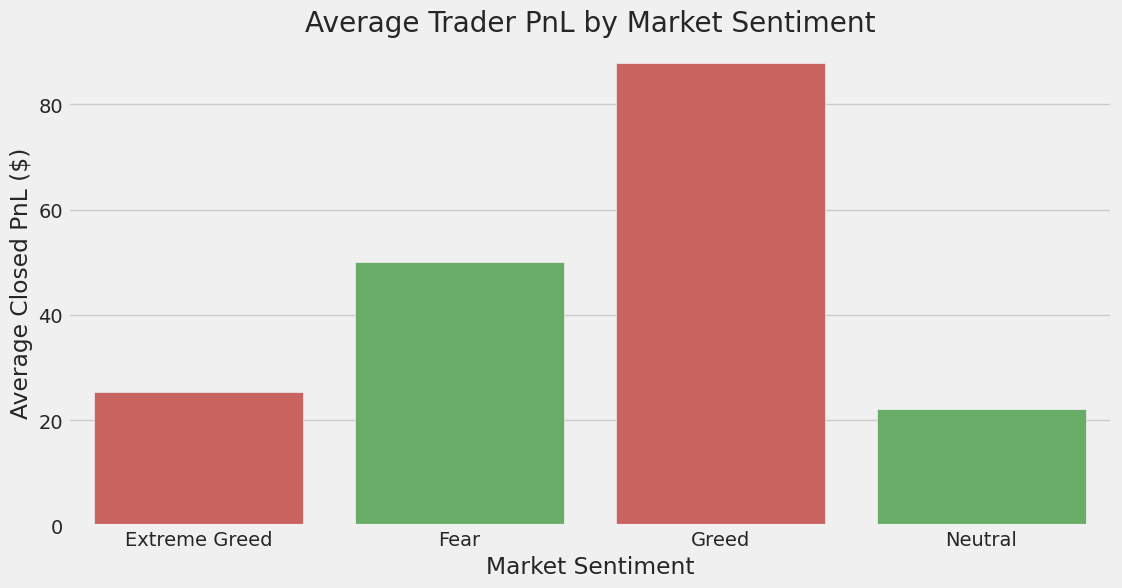

In [20]:
sentiment_performance = merged_df.groupby('classification')['Closed PnL'].agg(['sum', 'mean', 'median', 'count', 'std'])
print(sentiment_performance)

plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_performance, x=sentiment_performance.index, y='mean', palette=['#d9534f', '#5cb85c'])
plt.title('Average Trader PnL by Market Sentiment')
plt.ylabel('Average Closed PnL ($)')
plt.xlabel('Market Sentiment')
plt.show()

# 2. Trading Behavior (Buy vs. Sell)

Side                 BUY      SELL
classification                    
Extreme Greed   0.484200  0.515800
Fear            0.493617  0.506383
Greed           0.424950  0.575050
Neutral         0.490828  0.509172


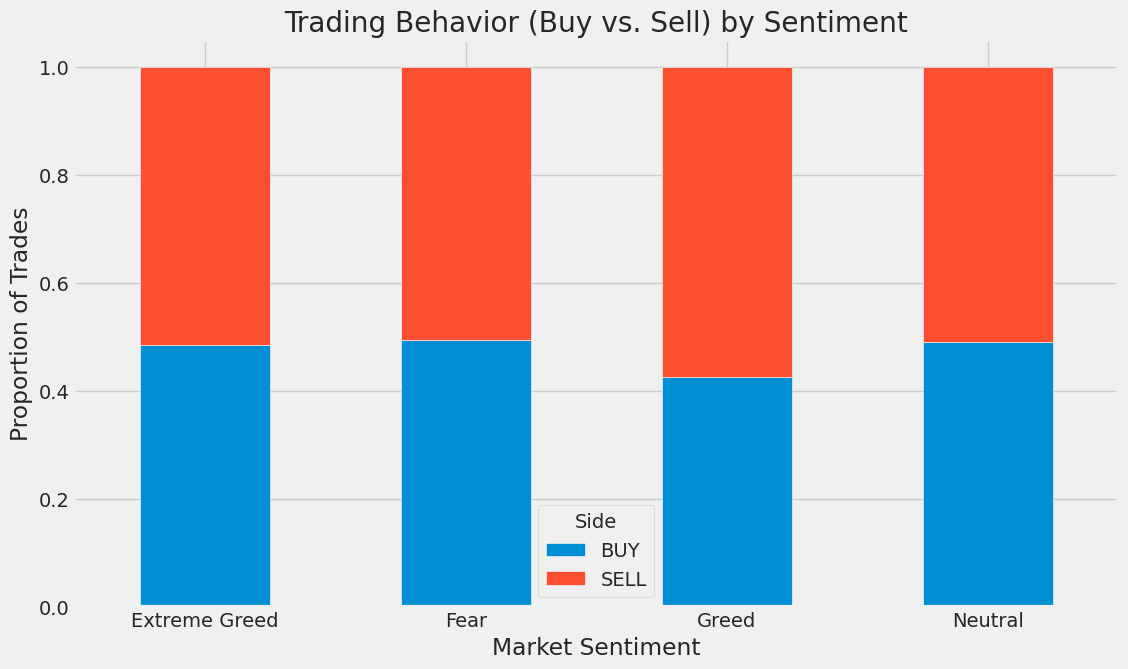

In [21]:
behavior_crosstab = pd.crosstab(merged_df['classification'], merged_df['Side'], normalize='index')
print(behavior_crosstab)

behavior_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Trading Behavior (Buy vs. Sell) by Sentiment')
plt.ylabel('Proportion of Trades')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=0)
plt.legend(title='Side')
plt.show()

# 3. Whale vs. Retail Analysis

classification  Extreme Greed        Fear       Greed    Neutral
trader_segment                                                  
Retail              10.886849    8.560489   22.378017   8.025935
Whale               47.756838  177.208733  294.345606  69.572767


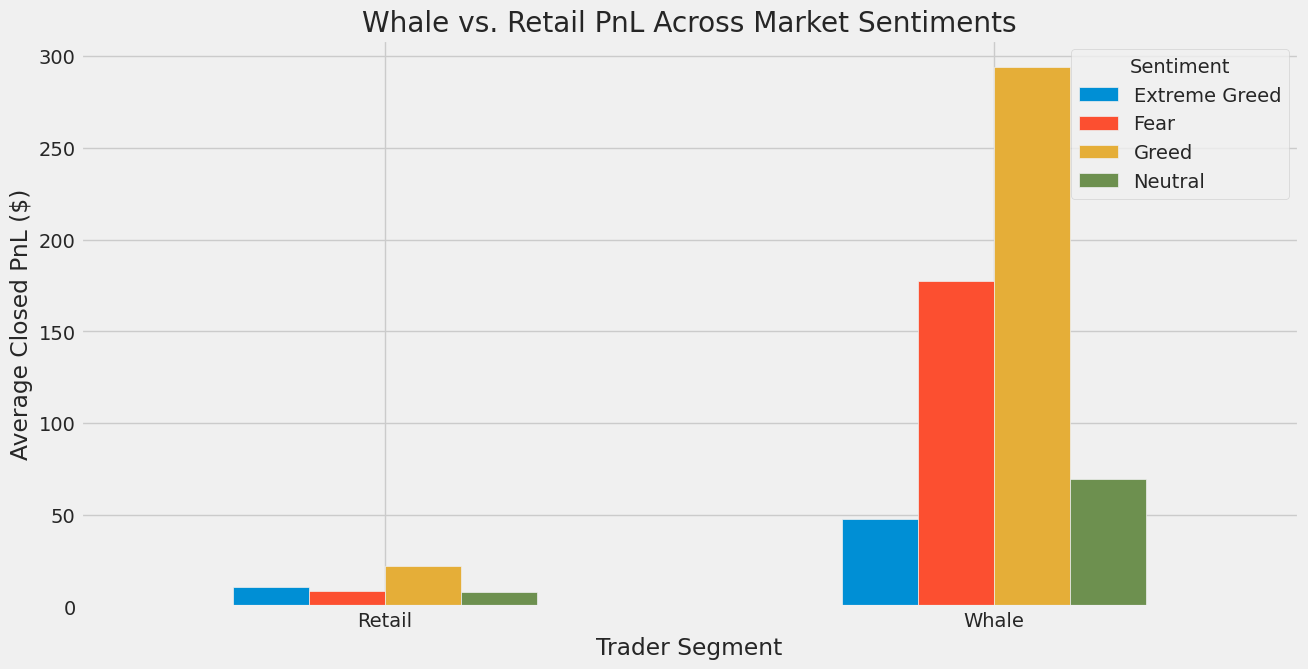

In [22]:
merged_df['trade_value_usd'] = abs(merged_df['Size USD'])
quantile_75 = merged_df['trade_value_usd'].quantile(0.75)
merged_df['trader_segment'] = np.where(merged_df['trade_value_usd'] >= quantile_75, 'Whale', 'Retail')

segment_analysis = merged_df.groupby(['trader_segment', 'classification'])['Closed PnL'].mean().unstack()
print(segment_analysis)

segment_analysis.plot(kind='bar', figsize=(14, 7))
plt.title('Whale vs. Retail PnL Across Market Sentiments')
plt.ylabel('Average Closed PnL ($)')
plt.xlabel('Trader Segment')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()

# 4. Contrarian vs. Momentum Analysis

                    mean           sum  count
strategy_type                                
Contrarian     78.605223  6.834646e+06  86949
Momentum       36.712649  3.054896e+06  83211
Other          23.804004  3.357079e+05  14103


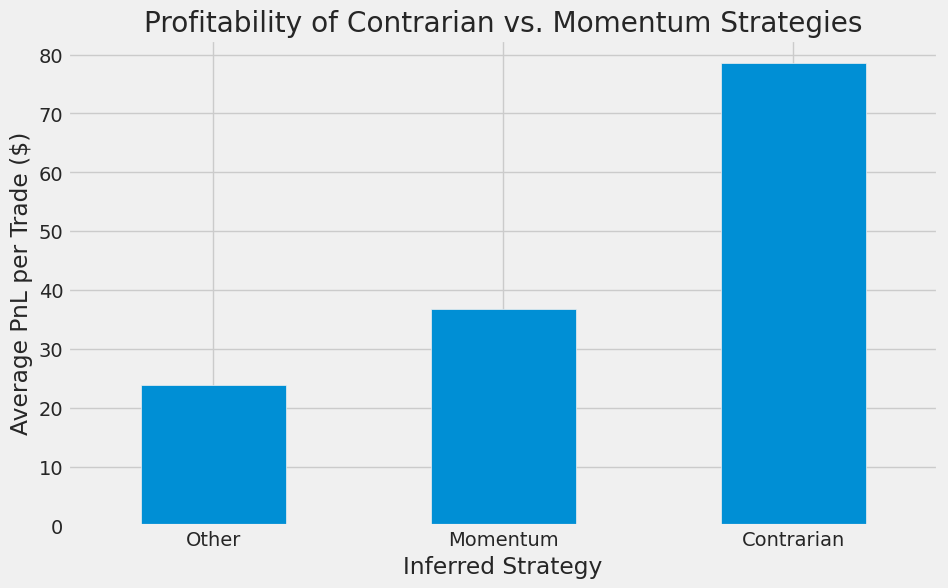

In [23]:
def classify_strategy(row):
    if (row['classification'] == 'Fear' and row['Side'].lower() == 'buy') or \
       (row['classification'] == 'Greed' and row['Side'].lower() == 'sell'):
        return 'Contrarian'
    elif (row['classification'] == 'Greed' and row['Side'].lower() == 'buy') or \
         (row['classification'] == 'Fear' and row['Side'].lower() == 'sell'):
        return 'Momentum'
    return 'Other'

merged_df['strategy_type'] = merged_df.apply(classify_strategy, axis=1)
strategy_performance = merged_df.groupby('strategy_type')['Closed PnL'].agg(['mean', 'sum', 'count'])
print(strategy_performance)

strategy_performance['mean'].sort_values().plot(kind='bar', figsize=(10, 6))
plt.title('Profitability of Contrarian vs. Momentum Strategies')
plt.ylabel('Average PnL per Trade ($)')
plt.xlabel('Inferred Strategy')
plt.xticks(rotation=0)
plt.show()